## Tensorflow

In [93]:
from sklearn.datasets import load_digits
digits = load_digits()

In [94]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [95]:
X = digits.data
Y = digits.target
print(X.shape, Y.shape)

(1797, 64) (1797,)


In [96]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [97]:
print(X.max(), X.min())

16.0 0.0


In [98]:
X /= 16.0
print(X.min(), X.max())

0.0 1.0


In [99]:
from sklearn.model_selection import train_test_split#60,20,20

In [100]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size = 0.6)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, train_size = 0.5)

In [101]:
print( x_train.shape, x_val.shape, x_test.shape)
print( y_train.shape, y_val.shape, y_test.shape)

(1078, 64) (360, 64) (359, 64)
(1078,) (360,) (359,)


In [102]:
print(y_train)

[0 6 9 ... 4 4 9]


In [103]:
import numpy as np
import matplotlib.pyplot as plt

In [104]:
inicial = 500

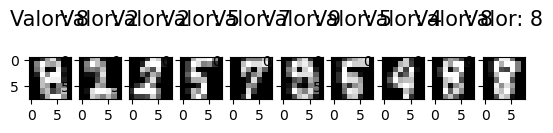

In [105]:
for index, (imagen, etiqueta) in enumerate(zip(X[inicial:inicial+10], Y[inicial:inicial+10])):
 plt.subplot(1, 10, index + 1)
 plt.imshow(np.reshape(imagen, (8,8)), cmap=plt.cm.gray)
 plt.title('Valor: %i\n' % etiqueta, fontsize = 15)

In [106]:
import tensorflow
from tensorflow.keras.utils import to_categorical

In [107]:
print(y_train[56])
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)
y_test = to_categorical(y_test, 10)
print(y_train[56])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [108]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [109]:
#Model #1

model = Sequential()
model.add(Dense(32, input_shape=(64,), activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
model.summary()

#Model #2

#model = Sequential()
#model.add(Dense(32, input_shape=(64,), activation='sigmoid'))
#model.add(Dense(64, activation='softmax'))
#model.add(Dense(64, activation='softmax'))
#model.add(Dense(64, activation='softmax'))
#model.add(Dense(64, activation='softmax'))
#model.add(Dense(10, activation='relu'))
#model.summary()


#Model #3
#model = Sequential()
#model.add(Dense(128, input_shape=(64,), activation='sigmoid'))
#model.add(Dense(128, activation='softmax'))
#model.add(Dense(128, activation='softmax'))
#model.add(Dense(10, activation='relu'))
#model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 32)                2080      
                                                                 
 dense_31 (Dense)            (None, 64)                2112      
                                                                 
 dense_32 (Dense)            (None, 64)                4160      
                                                                 
 dense_33 (Dense)            (None, 128)               8320      
                                                                 
 dense_34 (Dense)            (None, 128)               16512     
                                                                 
 dense_35 (Dense)            (None, 10)                1290      
                                                                 
Total params: 34474 (134.66 KB)
Trainable params: 3447

import  tensorflow as tf
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate = 1e-3), metrics = ['accuracy'])

In [110]:
import  tensorflow as tf
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.01),
    loss='mean_squared_error',
    metrics = ['accuracy']
)

In [111]:
history = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 200, batch_size = 64, verbose = 2)

Epoch 1/200


2023-10-03 14:02:53.834309: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-03 14:02:56.739085: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


17/17 - 4s - loss: 0.0934 - accuracy: 0.0983 - val_loss: 0.0927 - val_accuracy: 0.0972 - 4s/epoch - 232ms/step
Epoch 2/200
17/17 - 0s - loss: 0.0922 - accuracy: 0.1020 - val_loss: 0.0928 - val_accuracy: 0.0972 - 137ms/epoch - 8ms/step
Epoch 3/200
17/17 - 0s - loss: 0.0915 - accuracy: 0.1020 - val_loss: 0.0924 - val_accuracy: 0.0917 - 129ms/epoch - 8ms/step
Epoch 4/200
17/17 - 0s - loss: 0.0919 - accuracy: 0.0863 - val_loss: 0.0921 - val_accuracy: 0.0917 - 132ms/epoch - 8ms/step
Epoch 5/200
17/17 - 0s - loss: 0.0922 - accuracy: 0.0816 - val_loss: 0.0920 - val_accuracy: 0.0917 - 136ms/epoch - 8ms/step
Epoch 6/200
17/17 - 0s - loss: 0.0919 - accuracy: 0.1039 - val_loss: 0.0922 - val_accuracy: 0.0861 - 129ms/epoch - 8ms/step
Epoch 7/200
17/17 - 0s - loss: 0.0914 - accuracy: 0.0983 - val_loss: 0.0914 - val_accuracy: 0.1306 - 158ms/epoch - 9ms/step
Epoch 8/200
17/17 - 0s - loss: 0.0912 - accuracy: 0.1030 - val_loss: 0.0901 - val_accuracy: 0.1833 - 237ms/epoch - 14ms/step
Epoch 9/200
17/17 - 

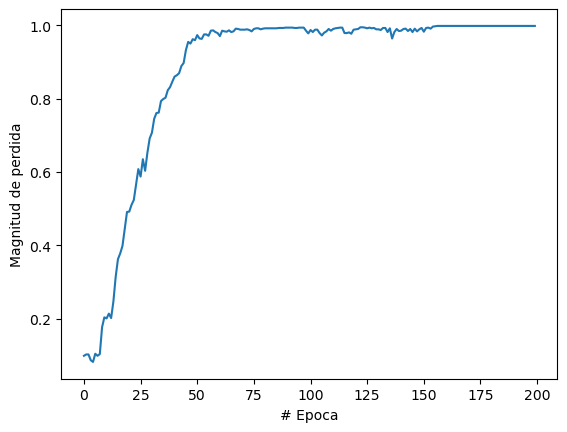

In [112]:
import matplotlib.pyplot as plt

plt.xlabel("# Epoca")
plt.ylabel("Magnitud de perdida")
plt.plot(history.history["accuracy"])

In [113]:
import numpy as np

pred1 = model.predict(x_test)
print(pred1)
print(pred1.shape)
pred1_dec = np.argmax(pred1, axis = 1)
print(pred1_dec)
label = np.argmax(y_test,axis = 1)


2023-10-03 14:03:23.076445: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - 1s 20ms/step
[[5.7259598e-04 5.6624191e-04 3.5081023e-06 ... 6.3515954e-06
  7.1519334e-04 7.8022356e-05]
 [9.9944431e-01 1.4157677e-05 2.1404758e-06 ... 6.6443963e-06
  5.2322143e-06 4.5080296e-06]
 [1.5100845e-04 4.8269227e-04 5.8885773e-05 ... 1.2755739e-05
  9.9542820e-01 2.9194768e-04]
 ...
 [1.3433342e-04 7.2162302e-06 1.2038200e-03 ... 6.1861478e-04
  1.4322599e-05 2.4142722e-03]
 [5.8884226e-04 5.6670007e-04 3.5235828e-06 ... 6.3936750e-06
  7.1512791e-04 7.8377794e-05]
 [6.0239816e-03 8.6190819e-04 2.6101904e-06 ... 7.2457806e-06
  3.2758100e-05 9.0509275e-05]]
(359, 10)
[5 0 8 9 6 7 7 0 8 6 0 6 7 0 0 0 3 4 6 3 7 7 4 9 7 4 6 8 2 1 3 2 3 9 0 4 4
 4 4 8 4 3 5 2 4 9 0 2 1 4 9 2 2 8 1 0 3 5 6 0 9 7 0 9 8 5 5 6 0 3 4 5 9 9
 1 9 5 5 3 0 1 7 7 1 1 9 4 6 5 3 3 0 4 1 6 9 2 9 2 7 5 5 9 1 7 3 7 3 9 8 1
 6 6 1 6 4 6 7 2 7 9 9 5 3 8 4 5 6 9 6 8 9 1 1 9 4 9 5 0 7 2 2 0 2 6 8 0 0
 7 6 5 2 0 7 6 9 9 3 3 5 1 8 9 0 6 8 5 2 9 7 3 8 1 8 2 5 8 8 6 8 7 6 5 1